## Import liabraries

In [1]:
#Importing the useful libraries
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

## Read the project dataset CSV file from file

In [2]:
# reading the data-set of "PEP" from file into pep_dataset.
pep_dataset = pd.read_csv("Data\Ames_House_Dataset.csv")

In [3]:
# Printing the head of the data frame
pep_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pep_dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## Understand the dataset

#### Identify the shape of the dataset

In [6]:
# Check the size of the dataset
pep_dataset.shape

(1460, 81)

In [7]:
# information about the dataset
pep_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Identify variables with null values

In [8]:
# Check for NA values
pep_dataset.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
# print out all columns with NA values
col_with_nan_values =  pep_dataset.columns[pep_dataset.isna().any()]

for col in col_with_nan_values:
    print(f"{col}\t {pep_dataset[col].isna().sum()} null values.")

LotFrontage	 259 null values.
Alley	 1369 null values.
MasVnrType	 8 null values.
MasVnrArea	 8 null values.
BsmtQual	 37 null values.
BsmtCond	 37 null values.
BsmtExposure	 38 null values.
BsmtFinType1	 37 null values.
BsmtFinType2	 38 null values.
Electrical	 1 null values.
FireplaceQu	 690 null values.
GarageType	 81 null values.
GarageYrBlt	 81 null values.
GarageFinish	 81 null values.
GarageQual	 81 null values.
GarageCond	 81 null values.
PoolQC	 1453 null values.
Fence	 1179 null values.
MiscFeature	 1406 null values.


#### Identify variables with unique values

In [10]:
# Print the unique values of each column
for col in pep_dataset.columns:
    print(col, ":", pep_dataset[col].unique())

Id : [   1    2    3 ... 1458 1459 1460]
MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea : [ 8450  9600 11250 ... 17217 13175  9717]
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'F

In [11]:
# print the count of values for each column
for i in pep_dataset.columns:
    print(i, ":", pep_dataset[i].value_counts())

Id : 1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
MSSubClass : 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
MSZoning : RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
LotFrontage : 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
LotArea : 7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
Street : Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley : Grvl    50
Pave    41
Name: Alley, dtype: int64
LotShape : Reg 

## Generate a separate dataset for numerical and categorical variables

#### Extract numerical variables from the dataset.

In [12]:
num_dataset = pep_dataset.loc[:,pep_dataset.dtypes!=object]
num_dataset.shape

(1460, 38)

In [13]:
num_dataset.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


#### Extract categorical variables from the dataset.

In [14]:
# To make merging easy Id is included in catagorical variables
cat_dataset = pep_dataset.loc[:,(pep_dataset.dtypes == object) | (pep_dataset.columns.isin(['Id']))]
cat_dataset.shape

(1460, 44)

In [15]:
cat_dataset.head(2)

,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## EDA of numerical variables

### Missing value treatment

In [16]:
# Find count and Percent of missing data

num_nan_total =  num_dataset.isna().sum().sort_values(ascending=False)
num_nan_percent = (num_dataset.isna().mean()*100).sort_values(ascending=False).map('{:.2f}%'.format)

num_missing_df = pd.concat([num_nan_total, num_nan_percent], axis=1,keys=['Missed-Count', 'Missed-Percent'])
num_missing_df[num_missing_df['Missed-Count'] > 0]

,Missed-Count,Missed-Percent
LotFrontage,259,17.74%
GarageYrBlt,81,5.55%
MasVnrArea,8,0.55%


#### Handling missing value of MasVnrArea

In [17]:
# This variable has the same number of missing data with MasVnrType. 
# It seems those house doesn't have Masonry so missing value can be replace with 0

num_dataset.loc[num_dataset['MasVnrArea'].isna(),'MasVnrArea'] = 0
num_dataset['MasVnrArea'].isna().sum()

0

#### Handling missing value of LotFrontage

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

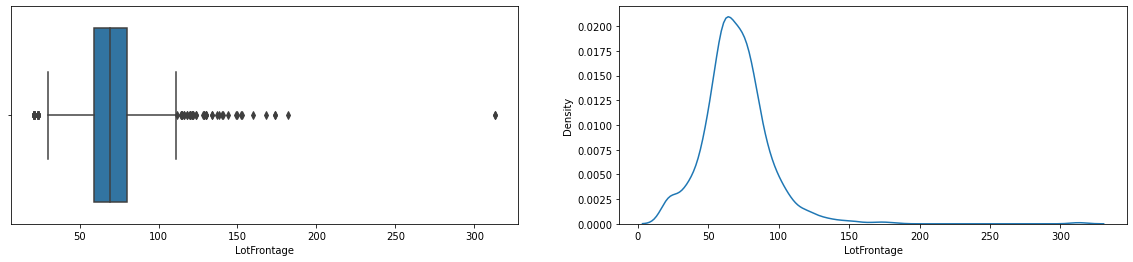

In [18]:
# Let see values distribution using Boxplot and Distribution plot to decide the best treatment

fig, axis = plt.subplots(1, 2, figsize=(20, 4))

# Box plot
sns.boxplot(data=num_dataset, x='LotFrontage',ax=axis[0])

# Distribution plot
sns.kdeplot(data=num_dataset, x='LotFrontage',ax=axis[1])

Observation:

Box plot shows there are several or large numbers of data points that act as outliers. Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values.

Distribution plot shows the data is right-skewed and when the data is skewed, it is good to consider using the median value for replacing the missing values.

In [19]:
# Replace the missing values using the median
num_dataset.loc[num_dataset['LotFrontage'].isna(), 'LotFrontage'] = num_dataset['LotFrontage'].median()
num_dataset['LotFrontage'].isnull().sum()

0

#### Handling missing values in GarageYrBlt column.

In [20]:
# Select all rows with null GarageYrBlt value. GarageType is a catgorical variable 
# so for visblity reasone I use the main dataset for this step
garage_df = pep_dataset[pep_dataset['GarageYrBlt'].isna()] 
garage_df[['GarageType', 'GarageYrBlt','GarageArea']]


,GarageType,GarageYrBlt,GarageArea
39,NaN,NaN,0
48,NaN,NaN,0
78,NaN,NaN,0
88,NaN,NaN,0
89,NaN,NaN,0
...,...,...,...
1349,NaN,NaN,0
1407,NaN,NaN,0
1449,NaN,NaN,0
1450,NaN,NaN,0


Observation:

All the null GarageYrBlt are 0 GarageArea and null GarageType
So there is no need to Imputing or deleteing those missing values

### Identify the skewness and distribution

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

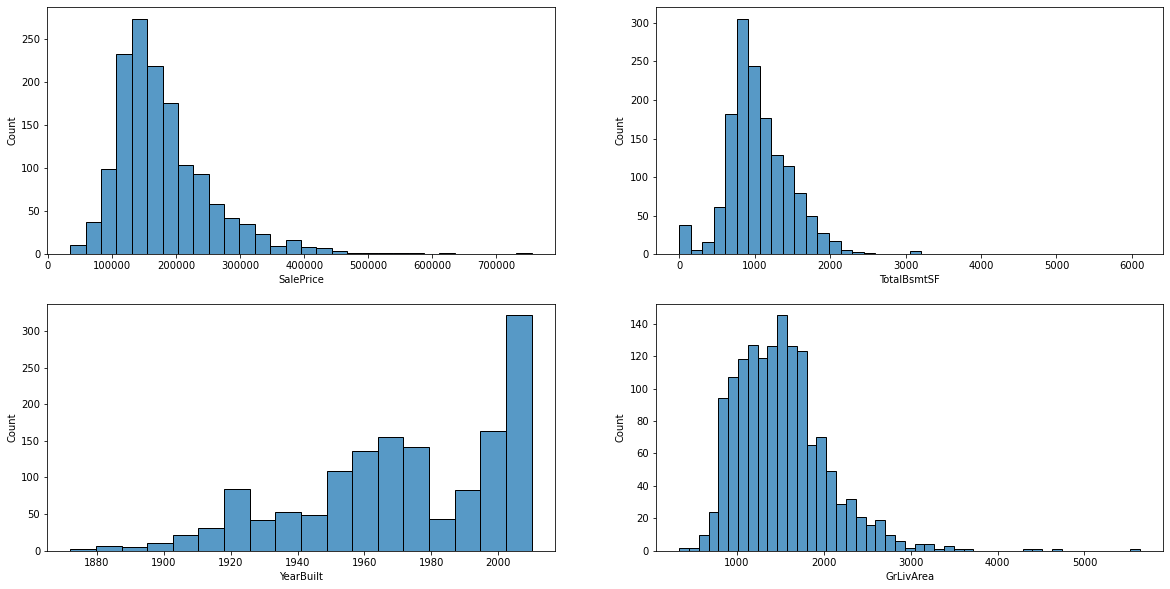

In [21]:
# Use histogram plot to show skewness and distribution of few selected columns

fig, axis = plt.subplots(2, 2, figsize=(20, 10))

sns.histplot(num_dataset.SalePrice,  ax=axis[0,0], bins=30)
sns.histplot(num_dataset.TotalBsmtSF, ax=axis[0,1],bins=40)
sns.histplot(num_dataset.YearBuilt, ax=axis[1,0])
sns.histplot(num_dataset.GrLivArea, ax=axis[1,1])


Observations:

SalePrice, TotalBsmtSF and GrLivArea have a long right tail so they are right-skewed distribution.
YearBuilt has a long left tail so it is a left-skeed distribution

### Identify significant variables using a correlation matrix 

In [22]:
num_data_corr  = num_dataset.corr(method='pearson').round(2)
num_data_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,...,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.36,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,...,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.01,-0.36,1.00,0.30,0.23,-0.05,0.12,0.08,0.18,0.21,...,0.08,0.14,0.01,0.06,0.04,0.18,-0.00,0.01,0.01,0.33
LotArea,-0.03,-0.14,0.30,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,...,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.23,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,...,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,0.01,-0.06,-0.05,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,...,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.31,0.25,...,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,-0.02,0.04,0.08,0.01,0.55,0.07,0.59,1.00,0.18,0.13,...,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,-0.05,0.02,0.18,0.10,0.41,-0.13,0.31,0.18,1.00,0.26,...,0.16,0.12,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.47
BsmtFinSF1,-0.01,-0.07,0.21,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,...,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39


<AxesSubplot:>

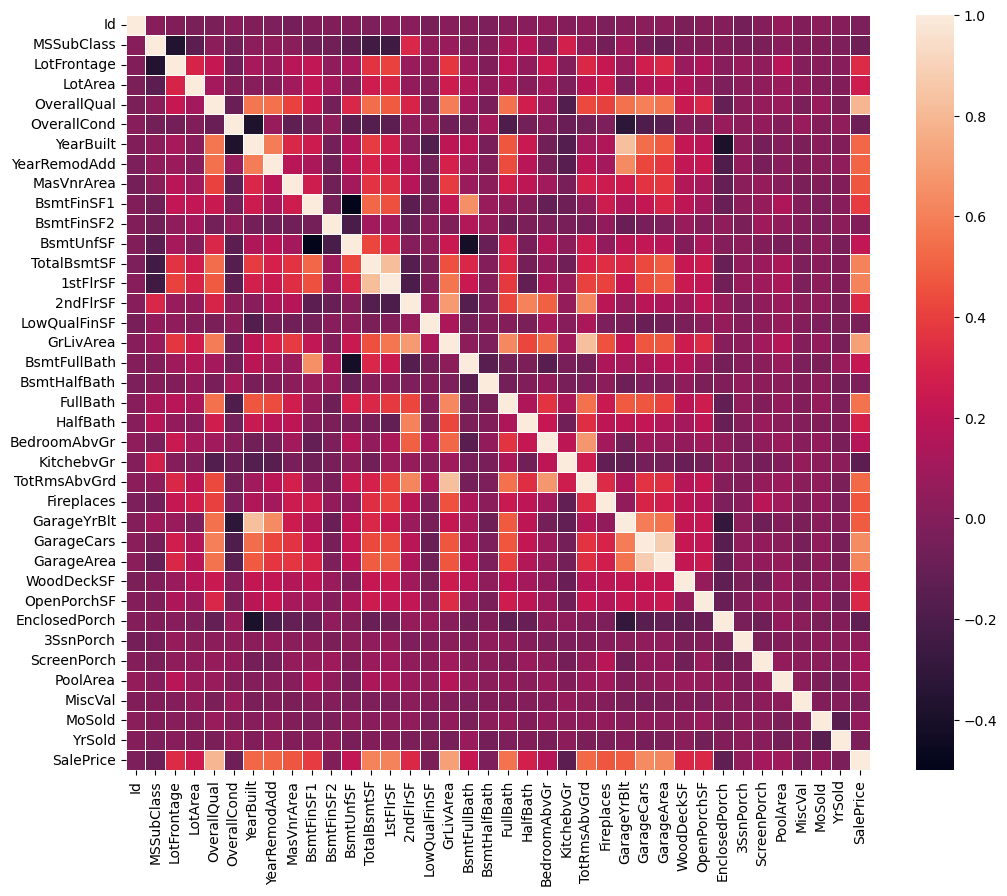

In [23]:

plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(num_data_corr,xticklabels=num_data_corr.columns, yticklabels=num_data_corr.columns, linewidths=0.5)

In [24]:
# correlation with output variable

unstack_matrix = num_data_corr.unstack()

# selecting highly correlated features
unstack_matrix = unstack_matrix[(abs(unstack_matrix)>=0.5) & (abs(unstack_matrix)<1) ]  
unstack_matrix

OverallQual  YearBuilt       0.57
             YearRemodAdd    0.55
             TotalBsmtSF     0.54
             GrLivArea       0.59
             FullBath        0.55
                             ... 
SalePrice    GrLivArea       0.71
             FullBath        0.56
             TotRmsAbvGrd    0.53
             GarageCars      0.64
             GarageArea      0.62
Length: 78, dtype: float64

Observations:

Our target value has a significnet relation with the below variables:
    GrLivArea
    FullBath
    TotRmsAbvGrd
    GarageCars
    GarageArea
GarageArea and GarageCars are higly corrlated so it is good to delete one of them. GarageCars has more correlation than GarageArea with the target variable.So GarageArea can be deleted 

In [25]:
# drop GarageArea
num_dataset = num_dataset.drop(['GarageArea'], axis=1)

<AxesSubplot:>

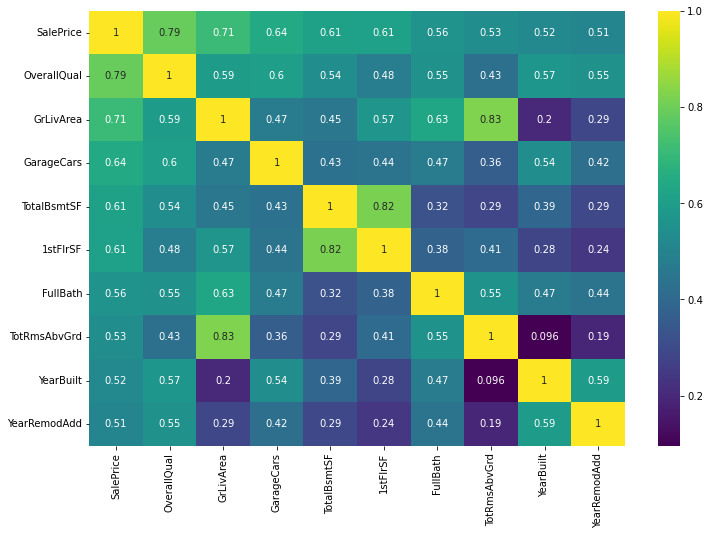

In [26]:
# SalePrice correlation matrix
top_ten = 10
cols = num_dataset.corr().nlargest(top_ten, 'SalePrice')['SalePrice'].index
nv_matrix = num_dataset[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(nv_matrix, annot=True, cmap='viridis')

### Pair plot for distribution and density

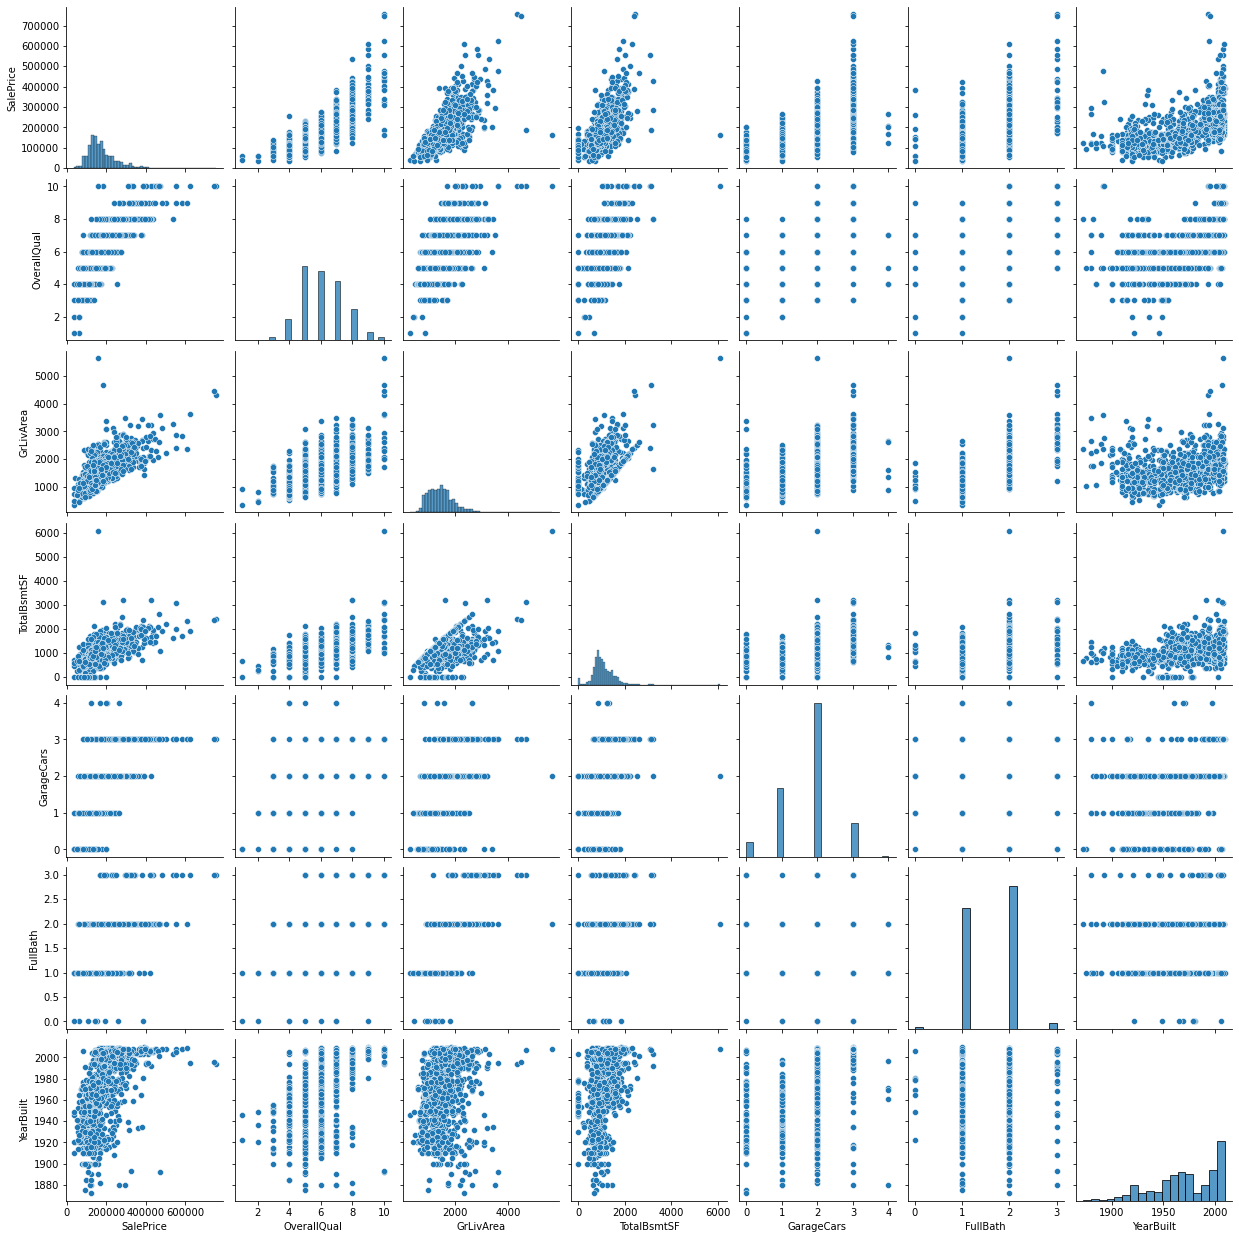

In [27]:
# Create the default pairplot

sns.pairplot(num_dataset, vars=["SalePrice","OverallQual","GrLivArea", "TotalBsmtSF","GarageCars","FullBath","YearBuilt"])

# sns.pairplot(num_dataset.FullBath, vars= ["SalePrice","GrLivArea"], height=3.5)
# sns.pairplot(num_dataset, vars= ["SalePrice","TotalBsmtSF"], height=3.5)
# sns.pairplot(num_dataset, vars= ["SalePrice","YearBuilt"], height=3.5)
# sns.pairplot(num_dataset, vars= ["SalePrice","GarageArea"], height=3.5)


## EDA of categorical variables

### Missing value treatment

In [28]:
# Missing data
cat_nan_total =  cat_dataset.isna().sum().sort_values(ascending=False)
cat_nan_percent = (cat_dataset.isna().mean()*100).sort_values(ascending=False).map('{:.2f}%'.format)
cat_missing_df = pd.concat([cat_nan_total, cat_nan_percent], axis=1,keys=['Missed-Count', 'Missed-Percent'])
cat_missing_df[cat_missing_df['Missed-Count'] > 0]


,Missed-Count,Missed-Percent
PoolQC,1453,99.52%
MiscFeature,1406,96.30%
Alley,1369,93.77%
Fence,1179,80.75%
FireplaceQu,690,47.26%
GarageType,81,5.55%
GarageFinish,81,5.55%
GarageCond,81,5.55%
GarageQual,81,5.55%
BsmtFinType2,38,2.60%


#### Handling variables with more than 40% missing data

In [29]:
# Variables with more than 40% missing data ('PoolQC', 'MiscFeature', 'Alley', Fence and FireplaceQu)
# do not seem like important so better to delete them.

cat_dataset = cat_dataset.drop(columns=['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
cat_dataset.shape


(1460, 39)

#### Handling missing data of variables that start with 'Garage'

In [30]:
# All variables that started with 'Garage' have the same number of missing data. 
# Regarding to garage the most relevant information is already collected by 'GarageCars' variable 
# So even if it is only about 5% of missing data it is better to delete them all.

cat_dataset = cat_dataset.drop(columns=['GarageType','GarageFinish','GarageCond','GarageQual'], axis=1)
cat_dataset.shape


(1460, 35)

#### Handling missing data of variables that start with 'Bsmt'

In [31]:
# Also variables start with 'Bsmt' have the same charastrstic like Garage and fail under the same logic,
# So it is better to delete them all.

cat_dataset = cat_dataset.drop(columns=['BsmtFinType2','BsmtExposure','BsmtCond','BsmtFinType1','BsmtQual'], axis=1)
cat_dataset.shape



(1460, 30)

#### Handling missing data of variable MasVnrType

In [32]:
# The variables MasVnrType and MasVnrArea has the same number of missing data.
# It seems those house doesn't have Masonry so missing value can be replace with 'None'
# Replace the missing value with 'None' using 'fiilna' method

cat_dataset['MasVnrType'] = cat_dataset['MasVnrType'].fillna('None')
cat_dataset['MasVnrType'].isnull().sum()

0

#### Handling missing data of variable Electrical

In [33]:
# Since this is just an observation, I'm going to impute with the Most Frequent Value

cat_dataset.loc[cat_dataset['Electrical'].isna(), 'Electrical'] = cat_dataset['Electrical'].mode()[0]
cat_dataset['Electrical'].isnull().sum()

0

### Count plot and box plot for bivariate analysis

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

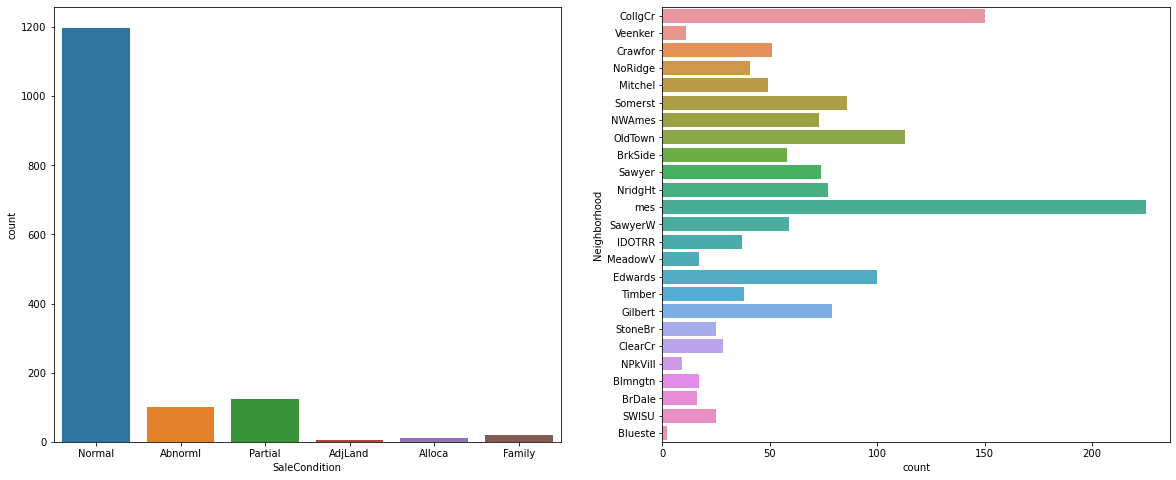

In [34]:
# count plot for SaleCondition and Neighborhood features

fig, axis = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(x='SaleCondition', data=cat_dataset,ax=axis[0])
sns.countplot(y='Neighborhood', data=cat_dataset,ax=axis[1])

### Identify significant variables using p-values and Chi-Square values

In [35]:
lbl_encoder = preprocessing.LabelEncoder()
cat_dataset['Neighborhood_encoded'] = lbl_encoder.fit_transform(cat_dataset.Neighborhood)
cat_dataset['SaleCondition_encoded'] = lbl_encoder.fit_transform(cat_dataset.SaleCondition)

chi_sq, p_value = calculate_bartlett_sphericity(cat_dataset[['Neighborhood_encoded','SaleCondition_encoded']])
chi_sq, p_value


(1.4190386568240438, 0.23356170025110073)

## Combine all the significant categorical and numerical variables

In [36]:
# Create new dataframe that holds only significent numerical varibles.
num_sign_var_df = num_dataset[["Id", "SalePrice","OverallQual","GrLivArea", "TotalBsmtSF","GarageCars","FullBath","YearBuilt"]]

num_sign_var_df.shape

(1460, 8)

In [37]:
# Create new dataframe that holds only significent categorical varibles.
cat_sign_var_df = cat_dataset[['Id', 'Neighborhood','SaleCondition']]

cat_sign_var_df.shape

(1460, 3)

In [38]:
# Now let's merge the significent numeriacl and catagorical datafream of with INNER JOIN manner, 
# so that the new data frame which matches the rows from num_sign_var_df and cat_sign_var_df where both Id are equal, 
# and have all the columns from both datafream.

merged_sign_var_df = num_sign_var_df.merge(cat_sign_var_df, on='Id', how='inner')

merged_sign_var_df.shape

(1460, 10)

In [39]:
# Merging has happned so drop the Id variable as it is of no use.
merged_sign_var_df.drop(['Id'], axis=1, inplace=True)

In [40]:
merged_sign_var_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   OverallQual    1460 non-null   int64 
 2   GrLivArea      1460 non-null   int64 
 3   TotalBsmtSF    1460 non-null   int64 
 4   GarageCars     1460 non-null   int64 
 5   FullBath       1460 non-null   int64 
 6   YearBuilt      1460 non-null   int64 
 7   Neighborhood   1460 non-null   object
 8   SaleCondition  1460 non-null   object
dtypes: int64(7), object(2)
memory usage: 114.1+ KB


In [41]:
merged_sign_var_df.head()

,SalePrice,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,Neighborhood,SaleCondition
0,208500,7,1710,856,2,2,2003,CollgCr,Normal
1,181500,6,1262,1262,2,2,1976,Veenker,Normal
2,223500,7,1786,920,2,2,2001,CollgCr,Normal
3,140000,7,1717,756,3,1,1915,Crawfor,Abnorml
4,250000,8,2198,1145,3,2,2000,NoRidge,Normal


## Plot box plot for the new dataset to find the variables with outliers

<AxesSubplot:xlabel='YearBuilt'>

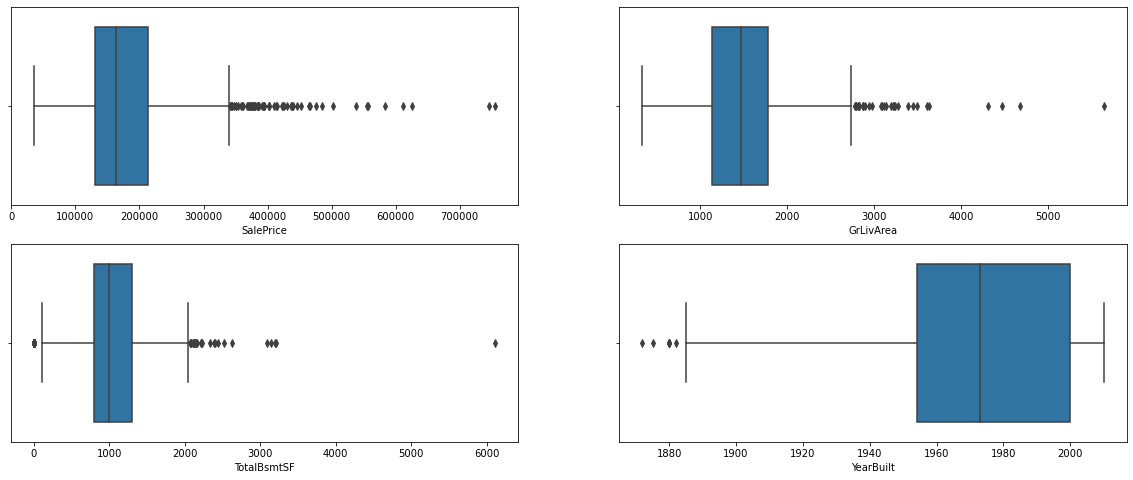

In [42]:
# Plot the boxplot to show the outliers

fig, axis = plt.subplots(2, 2, figsize=(20, 8))

sns.boxplot(data=merged_sign_var_df, x='SalePrice', ax=axis[0,0])
sns.boxplot(data=merged_sign_var_df, x='GrLivArea', ax=axis[0,1])
sns.boxplot(data=merged_sign_var_df, x='TotalBsmtSF', ax=axis[1,0])
sns.boxplot(data=merged_sign_var_df, x='YearBuilt', ax=axis[1,1])

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

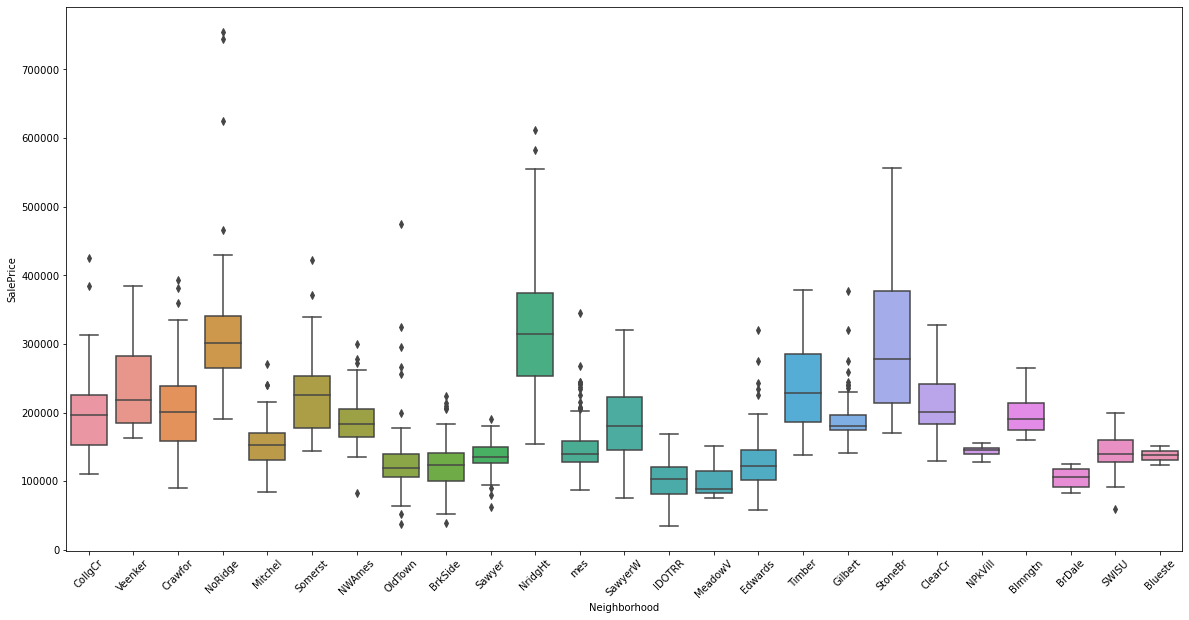

In [43]:
# Plot the boxplot of SalePrice variable and Neighborhood
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data=merged_sign_var_df, y='SalePrice', x='Neighborhood')

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

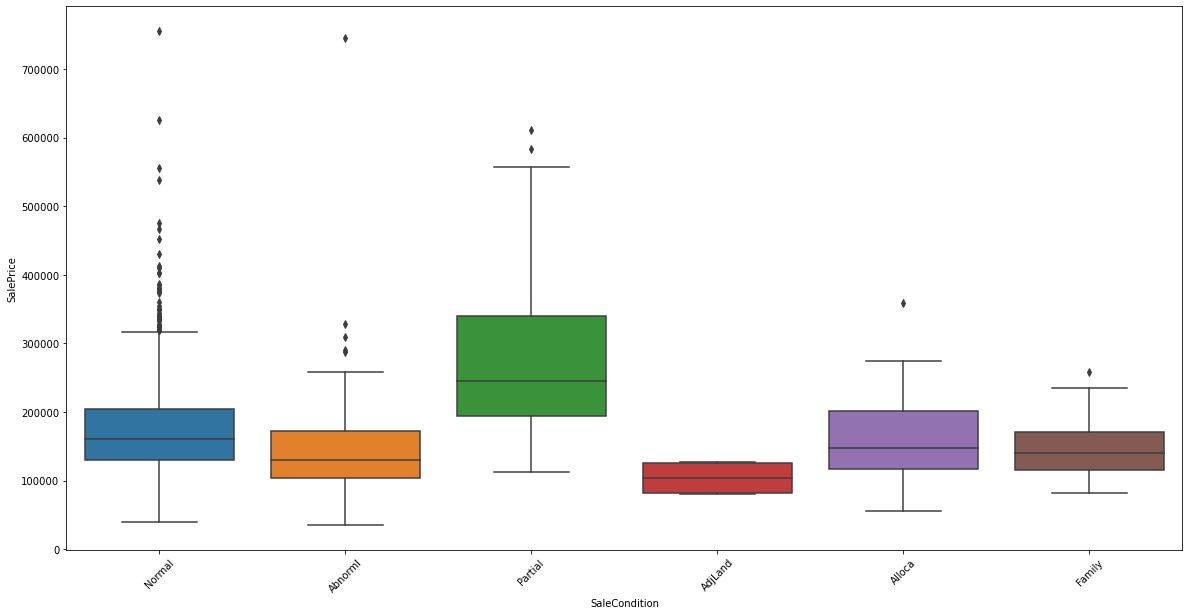

In [44]:
# Plot the boxplot of SalePrice variable and SaleCondition
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data=merged_sign_var_df, y='SalePrice', x='SaleCondition')

## Case Study Summary
I have studied the variables, analyzed 'SalePrice' alone and with the most correlated variables,</br> 
dealt with missing data and even transformed categorical variables into encoded variables.

Used a whole range of techniques in Python, using the libraries:</br>
[Pandas], [Matplotlib], [Seaborn], [NumPy], [SciPy], [sklearn] and [factor_analyzer]

All the below variables were established in analysis as a main factors of house price:
* SalePrice
* OverallQual
* GrLivArea
* TotalBsmtSF
* GarageCars
* FullBath
* YearBuilt
* Neighborhood
* SaleCondition